In [2]:
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Import pyrtlib package

In [3]:
from pyrtlib.atmp import AtmosphericProfiles as atmp
from pyrtlib.main import tb_cloud_rte
from pyrtlib.utils import ppmv2gkg, mr2rh

In [4]:
atm = ['Tropical',
       'Midlatitude Summer',
       'Midlatitude Winter',
       'Subarctic Summer',
       'Subarctic Winter',
       'U.S. Standard']

mdl = 'rose16'

# Performing calculation from Satellite

## Load standard atmosphere (low res at lower levels, only 1 level within 1 km)

In [5]:
z, p, d, t, md = atmp.gl_atm(atmp.TROPICAL)

gkg = ppmv2gkg(md[:, atmp.H2O], atmp.H2O)
rh = mr2rh(p, t, gkg)[0] / 100

## default no cloud

In [6]:
ang = np.array([90.])
frq = np.arange(20, 201, 1)
nf = len(frq)

denliq = np.zeros(z.shape)
denice = np.zeros(z.shape)
cldh = np.zeros((2, 0))

## plotting

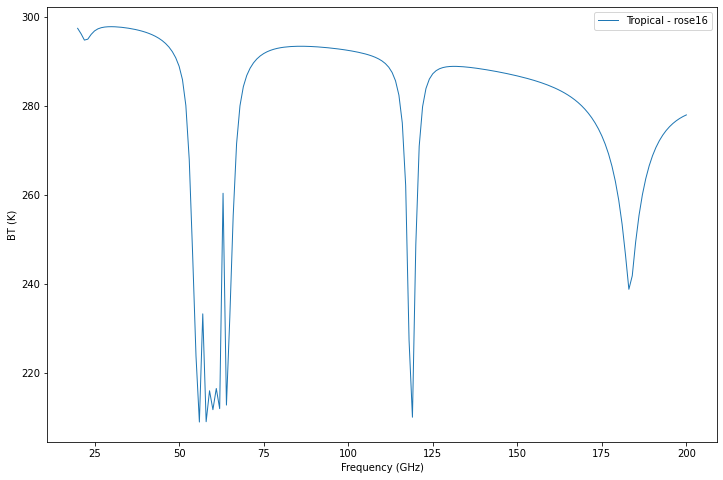

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('BT (K)')

df = tb_cloud_rte(z, p, t, rh, denliq, denice, cldh, frq, ang, absmdl=mdl, ray_tracing=True, from_sat=True)
df = df.set_index(frq)
df.tbtotal.plot(ax=ax, linewidth=1, label='{} - {}'.format(atm[atmp.TROPICAL], mdl))

ax.legend()
plt.show()

In [8]:
df

,tbtotal,tbatm,tmr,tauwet,taudry,tauliq,tauice
20,297.391838,NaN,281.191287,0.120341,0.012855,0.0,0.0
21,296.186240,NaN,280.517137,0.188802,0.013524,0.0,0.0
22,294.748245,NaN,279.175653,0.261841,0.014259,0.0,0.0
23,294.953483,NaN,279.830575,0.257906,0.015066,0.0,0.0
24,296.027799,NaN,280.971991,0.202303,0.015954,0.0,0.0
...,...,...,...,...,...,...,...
196,275.997899,NaN,275.396235,3.672911,0.025784,0.0,0.0
197,276.611319,NaN,275.881854,3.459942,0.025956,0.0,0.0
198,277.129218,NaN,276.279020,3.289797,0.026129,0.0,0.0
199,277.566840,NaN,276.605436,3.152663,0.026302,0.0,0.0


In [9]:
mdl = 'rose03'
df_rose03 = tb_cloud_rte(z, p, t, rh, denliq, denice, cldh, frq, ang, absmdl=mdl, ray_tracing=True, from_sat=True)
df_rose03 = df_rose03.set_index(frq)

In [10]:
df['rose03'] = df_rose03.tbtotal

In [11]:
df

,tbtotal,tbatm,tmr,tauwet,taudry,tauliq,tauice,rose03
20,297.391838,NaN,281.191287,0.120341,0.012855,0.0,0.0,297.401124
21,296.186240,NaN,280.517137,0.188802,0.013524,0.0,0.0,296.268700
22,294.748245,NaN,279.175653,0.261841,0.014259,0.0,0.0,294.953050
23,294.953483,NaN,279.830575,0.257906,0.015066,0.0,0.0,295.074002
24,296.027799,NaN,280.971991,0.202303,0.015954,0.0,0.0,296.033144
...,...,...,...,...,...,...,...,...
196,275.997899,NaN,275.396235,3.672911,0.025784,0.0,0.0,276.173334
197,276.611319,NaN,275.881854,3.459942,0.025956,0.0,0.0,276.778176
198,277.129218,NaN,276.279020,3.289797,0.026129,0.0,0.0,277.287966
199,277.566840,NaN,276.605436,3.152663,0.026302,0.0,0.0,277.718030


## rose16 vs rose03

<AxesSubplot:xlabel='tbtotal', ylabel='rose03'>

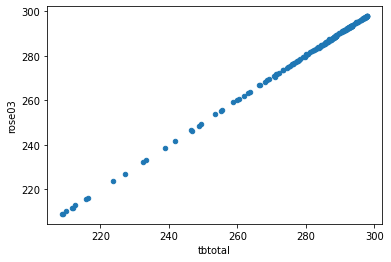

In [12]:
df.plot(kind='scatter', x='tbtotal', y='rose03')

# Performing calculation from ground

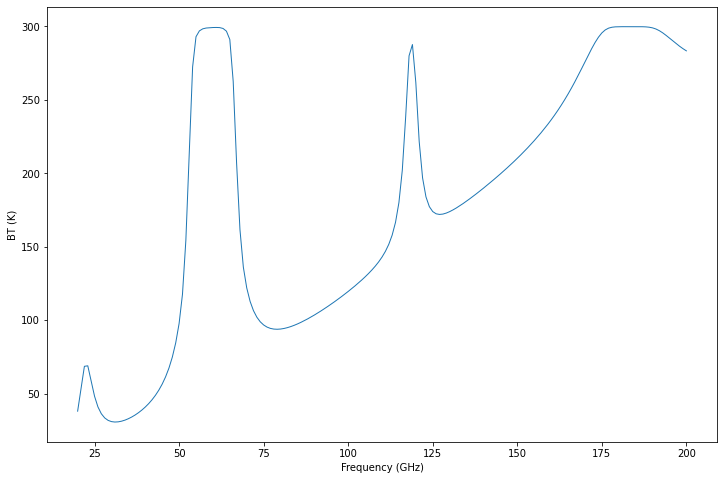

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('BT (K)')
df = tb_cloud_rte(z, p, t, rh, denliq, denice, cldh, frq, ang, absmdl=mdl, ray_tracing=True, from_sat=False)
df = df.set_index(frq)
df.tbtotal.plot(ax=ax, linewidth=1, label='{} - {}'.format(atm[atmp.TROPICAL], mdl))
plt.show()